# Data Cleaning in Python
#### Data cleaning, or cleansing, is the process of correcting and deleting inaccurate records from a database or table. It mainly consists of identifying and replacing incomplete, inaccurate, irrelevant, or otherwise problematic (‘dirty’) data and records.

### Issues in Datasets:
	- Missing Values
	- Irrelevant data
	- Duplicated records
	- Outliers
    - Noise Values
	- …
##### The error in the data is primarily due to source of the data.

### Outlier
##### Data that is out of range of data that we expect
##### Noise Value: Unwanted and wrong data


Example: In a 50–100 people Average annual income/assets classifier if you include Bill Gates then automatically everyone in that study becomes a millionaire on an average. 
#### An outlier is not a false value or void in meaning. It is definite and accurate but when it is linked with the other data in your model, it is just not in the same range. 


### How to detect Outliers?
- Using box plot
- Using Z score
- IQR (Inter Quartile Range)





In [24]:
import pandas as pd
import numpy as np 

In [25]:
outlier_data= [10,22,22,33,22,41,74,83,25,30,60,20,62,74,23,890,899,32,68, 97,43,12,25,92,23,12,59,24,33,85,30,1001,45,22,52,1005]

In [26]:
df = pd.DataFrame(outlier_data, columns=['Values'])

In [27]:
df.head()

,Values
0,10
1,22
2,22
3,33
4,22


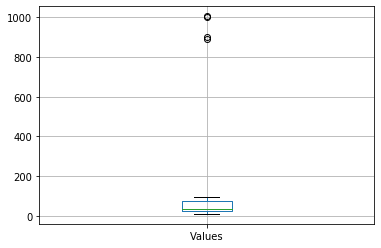

In [28]:
#Box Plot uses IQR

df.boxplot(column=['Values'])

### Using Z score
The value of the z-score tells, how many standard deviations a  datapoint is away from the mean. 

If a z-score is equal to 0, it is on the mean.

Formula for Z score = (Observation — Mean)/Standard Deviation

z = (X — μ) / σ

The z-score is positive if the value lies above the mean, and negative if it lies below the mean.

In [29]:
print(df.mean())
print(df.std())
print(df.median())

Values    143.055556
dtype: float64
Values    290.46504
dtype: float64
Values    37.0
dtype: float64


In [30]:
outliers=[]
def detect_outlier(data):
    
    threshold=2
    mean_1 = np.mean(data)
    std_1 = np.std(data)
    
    
    for y in data:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [31]:
outlier_datapoints = detect_outlier(outlier_data)
outlier_datapoints

[890, 899, 1001, 1005]

### InterQuartile Range
75% - 25% values in the dataset

IQR tells how spread the middle values are. It can be used to tell when a value is too far from the middle.
An outlier is a point which falls more than 1.5 times the interquartile range above the third quartile or below the first quartile.

Steps
- Arrange the data in increasing order.
- Calculate the first quartile(q1) and third quartile(q2)
- Find the interquartile range (q3 - q1)
- Find lower bound  q1 - (1.5 *  iqr)
- Find upper bound  q3 + (1.5 * iqr)
- Anything that lies lower and upper bound is an outlier

In [32]:
sorted(outlier_data)

[10,
 12,
 12,
 20,
 22,
 22,
 22,
 22,
 23,
 23,
 24,
 25,
 25,
 30,
 30,
 32,
 33,
 33,
 41,
 43,
 45,
 52,
 59,
 60,
 62,
 68,
 74,
 74,
 83,
 85,
 92,
 97,
 890,
 899,
 1001,
 1005]

In [33]:
q1, q3= np.percentile(outlier_data ,[25,75])

In [34]:
iqr = q3 - q1
iqr

51.0

In [35]:
lower_bound_val = q1 - (1.5 *  iqr)
upper_bound_val = q3 + (1.5 * iqr)

In [36]:
lower_bound_val

-53.5

In [37]:
upper_bound_val

150.5

In [38]:
outlier_iqr_list=[]
for d in outlier_data:
    if d < lower_bound_val or d > upper_bound_val:
        outlier_iqr_list.append(d)
        
outlier_iqr_list
    

[890, 899, 1001, 1005]

In [39]:
#Removing the Outlier
df = df[(df.Values<150.5) & (df.Values>-53.5)]

In [40]:
df.head()

,Values
0,10
1,22
2,22
3,33
4,22


### Text data 
In machine learning we ultimately always work with numbers or specifically vectors.
##### A vector is simply an array of numbers, such as (1, 2, 3)—or a nested array that contains other arrays of numbers, such as (1, 2, (1, 2, 3)).

The main points:

    -All non-numerical data types (such as images, text, and categories) must eventually be represented as numbers
    -In machine learning, the numerical representation will be in the form of an array of numbers—that is, a vector
    
Therefore, Text data needs to be cleaned and encoded to numerical values before giving them to machine learning models, this process of cleaning and encoding is called as Text Preprocessing

#### Steps to clean Text Data
    - Capitalization/De-capitalization
    - Removal of punctuation
    - Tokenization
    - Removal of Stopwords
    - Lemmatizing/Stemming

In [41]:
import nltk

In [42]:
#]nltk.download()
#uncomment the abover line if you don't have installed nltk packages


In [43]:
data = "it has become imperative for an organization to have a structure in place to mine actionable insights from the text being generated. from social media analytics to risk management and cybercrime protection, \
dealing with text data has never been more important."

## Removal of punctuation: 
Punctuation marks don’t add much information to the data, hence we need to remove it. 

In [44]:
#importing python library
import string
print( string.punctuation)

#checking each character whether it contains any punctuation
nopunc = []
for char in data:
    if char not in string.punctuation:
        nopunc.append(char)

#joining all the individual characters into words
nopunc = ''.join(nopunc)
nopunc

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


'it has become imperative for an organization to have a structure in place to mine actionable insights from the text being generated from social media analytics to risk management and cybercrime protection dealing with text data has never been more important'

## Tokenization: 
The process of breaking down a text paragraph into smaller chunks such as words or sentence is called Tokenization. 
. 

In [45]:
#Simple tokenization example using split function on Whitespaces
nopunc.split()

['it',
 'has',
 'become',
 'imperative',
 'for',
 'an',
 'organization',
 'to',
 'have',
 'a',
 'structure',
 'in',
 'place',
 'to',
 'mine',
 'actionable',
 'insights',
 'from',
 'the',
 'text',
 'being',
 'generated',
 'from',
 'social',
 'media',
 'analytics',
 'to',
 'risk',
 'management',
 'and',
 'cybercrime',
 'protection',
 'dealing',
 'with',
 'text',
 'data',
 'has',
 'never',
 'been',
 'more',
 'important']

In [46]:
#using nltk library to tokenize on whitespaces and punctuation
from nltk.tokenize import word_tokenize
tokens = word_tokenize(nopunc)
tokens

['it',
 'has',
 'become',
 'imperative',
 'for',
 'an',
 'organization',
 'to',
 'have',
 'a',
 'structure',
 'in',
 'place',
 'to',
 'mine',
 'actionable',
 'insights',
 'from',
 'the',
 'text',
 'being',
 'generated',
 'from',
 'social',
 'media',
 'analytics',
 'to',
 'risk',
 'management',
 'and',
 'cybercrime',
 'protection',
 'dealing',
 'with',
 'text',
 'data',
 'has',
 'never',
 'been',
 'more',
 'important']

## Removal of Stopwords: 
Stopwords considered as noise in the text. stopwords are the common words such as ‘a’, ‘an’, ‘the’, ‘this’, etc which again don’t add much meaning to the data and should be removed. This improves the computational time and also free up the database space.

In [47]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'some', 'have', 'we', 'only', 'as', 'shan', 'yours', 'out', "won't", 'yourselves', 'more', 'should', 'but', 'this', 'no', 'because', 'be', 'y', 'needn', 'same', 'did', 'couldn', 'and', 'over', 'my', 'above', 'by', 'on', 'most', "she's", 'here', 'so', 'theirs', 'won', 'herself', 'wasn', 'down', "you've", 'isn', 'not', 'of', "hadn't", 'does', "shan't", 'you', 'all', 'very', "isn't", 'o', 'yourself', 'themselves', 'that', 't', 'd', "don't", "mightn't", 'shouldn', 'were', 'him', 'about', 'from', 'itself', 'there', 'other', 'do', "aren't", "shouldn't", 'mightn', 'he', 'himself', 'these', 'nor', 'just', 'into', 'during', 'such', 'doing', "you'd", 'wouldn', 'the', 'our', 'mustn', 'few', 'those', "couldn't", 'further', 'below', 'under', 'with', 'what', 'an', 'ma', 'she', "you're", 'when', 'aren', 'weren', 'again', 'how', "didn't", "you'll", "it's", 'hers', "should've", 'whom', 'can', "needn't", 'haven', 'for', 'being', 'her', "haven't", 'at', "doesn't", 'having', 'after', 'then', 'now', 'are'

In [48]:
filtered_data=[]
for w in tokens:
    if w not in stop_words:
        filtered_data.append(w)
print("Tokenized Sentence:",tokens)
print("-----------------------------------------------------------------------------------------------------")
print("After removing Stop words:",filtered_data)

Tokenized Sentence: ['it', 'has', 'become', 'imperative', 'for', 'an', 'organization', 'to', 'have', 'a', 'structure', 'in', 'place', 'to', 'mine', 'actionable', 'insights', 'from', 'the', 'text', 'being', 'generated', 'from', 'social', 'media', 'analytics', 'to', 'risk', 'management', 'and', 'cybercrime', 'protection', 'dealing', 'with', 'text', 'data', 'has', 'never', 'been', 'more', 'important']
-----------------------------------------------------------------------------------------------------
After removing Stop words: ['become', 'imperative', 'organization', 'structure', 'place', 'mine', 'actionable', 'insights', 'text', 'generated', 'social', 'media', 'analytics', 'risk', 'management', 'cybercrime', 'protection', 'dealing', 'text', 'data', 'never', 'important']


## Stemming:
It is the process of converting a word into its root or base form. Also, the prefixes or suffixes get removed from a word that results in a word that may or may not be meaningful.
###              e.g : running ---> run
###               generated ---> gener


In [49]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
stemmed_words=[]
for w in filtered_data:
    stemmed_words.append(porter.stem(w))

print("After removing Stop words:",filtered_data)
print("-------------------------------------------------------------------------------------")
print("After Stemming:",stemmed_words)

After removing Stop words: ['become', 'imperative', 'organization', 'structure', 'place', 'mine', 'actionable', 'insights', 'text', 'generated', 'social', 'media', 'analytics', 'risk', 'management', 'cybercrime', 'protection', 'dealing', 'text', 'data', 'never', 'important']
-------------------------------------------------------------------------------------
After Stemming: ['becom', 'imper', 'organ', 'structur', 'place', 'mine', 'action', 'insight', 'text', 'gener', 'social', 'media', 'analyt', 'risk', 'manag', 'cybercrim', 'protect', 'deal', 'text', 'data', 'never', 'import']


## Lemmatization: it is a process that is similar to stemming that is converting a word into its root or base form but unlike stemming it always returns a proper word that can be found in a dictionary.

### e.g. generated ---> generate

In [50]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lem_data = []
for word in filtered_data:
    lem_data.append(lemmatizer.lemmatize(word, 'v'))

lem_data

['become',
 'imperative',
 'organization',
 'structure',
 'place',
 'mine',
 'actionable',
 'insights',
 'text',
 'generate',
 'social',
 'media',
 'analytics',
 'risk',
 'management',
 'cybercrime',
 'protection',
 'deal',
 'text',
 'data',
 'never',
 'important']

### Stemming vs Lemmatization
Stemming and Lemmatization both generate the root form of the  words. The difference is that stem might not be an actual word whereas, lemma is an actual language word.

Stemming follows an algorithm with steps to perform on the words which makes it faster. 

Whereas, in lemmatization, you used WordNet corpus and a corpus for stop words as well to produce lemma which makes it slower than stemming. You also had to define a parts-of-speech to obtain the correct lemma.

If you lemmatize the word 'Caring', it would return 'Care'. 
If you stem, it would return 'Car' and this is erroneous.

Words such as walking, running, swimming will return walk, run, swim for both stemming and lemmatize

### POS Tagging
The primary target of Part-of-Speech(POS) tagging is to identify the grammatical group of a given word. Whether it is a NOUN, PRONOUN, ADJECTIVE, VERB, ADVERBS, etc. based on the context. POS Tagging looks for relationships within the sentence and assigns a corresponding tag to the word.

If no POS Tag is provided to WordNetLemmatizer, It defaults to nouns.

In [51]:
nltk.pos_tag(tokens)

[('it', 'PRP'),
 ('has', 'VBZ'),
 ('become', 'VBN'),
 ('imperative', 'JJ'),
 ('for', 'IN'),
 ('an', 'DT'),
 ('organization', 'NN'),
 ('to', 'TO'),
 ('have', 'VB'),
 ('a', 'DT'),
 ('structure', 'NN'),
 ('in', 'IN'),
 ('place', 'NN'),
 ('to', 'TO'),
 ('mine', 'VB'),
 ('actionable', 'JJ'),
 ('insights', 'NNS'),
 ('from', 'IN'),
 ('the', 'DT'),
 ('text', 'NN'),
 ('being', 'VBG'),
 ('generated', 'VBN'),
 ('from', 'IN'),
 ('social', 'JJ'),
 ('media', 'NNS'),
 ('analytics', 'NNS'),
 ('to', 'TO'),
 ('risk', 'VB'),
 ('management', 'NN'),
 ('and', 'CC'),
 ('cybercrime', 'NN'),
 ('protection', 'NN'),
 ('dealing', 'VBG'),
 ('with', 'IN'),
 ('text', 'NN'),
 ('data', 'NNS'),
 ('has', 'VBZ'),
 ('never', 'RB'),
 ('been', 'VBN'),
 ('more', 'RBR'),
 ('important', 'JJ')]

In [52]:
nltk.help.upenn_tagset("VBZ")

VBZ: verb, present tense, 3rd person singular
    bases reconstructs marks mixes displeases seals carps weaves snatches
    slumps stretches authorizes smolders pictures emerges stockpiles
    seduces fizzes uses bolsters slaps speaks pleads ...


### Vectorization
After we have normalized the text, we can take the next step of actually encoding it in a numerical form. 
This is done by text vectorization—that is, by turning a piece of text into a vector.

Common approaches include:

- Term Frequency-Inverse Document Frequency (TF-IDF) vectorization
- Word embedding, as done with Word2vec or Global Vectors (GloVe)

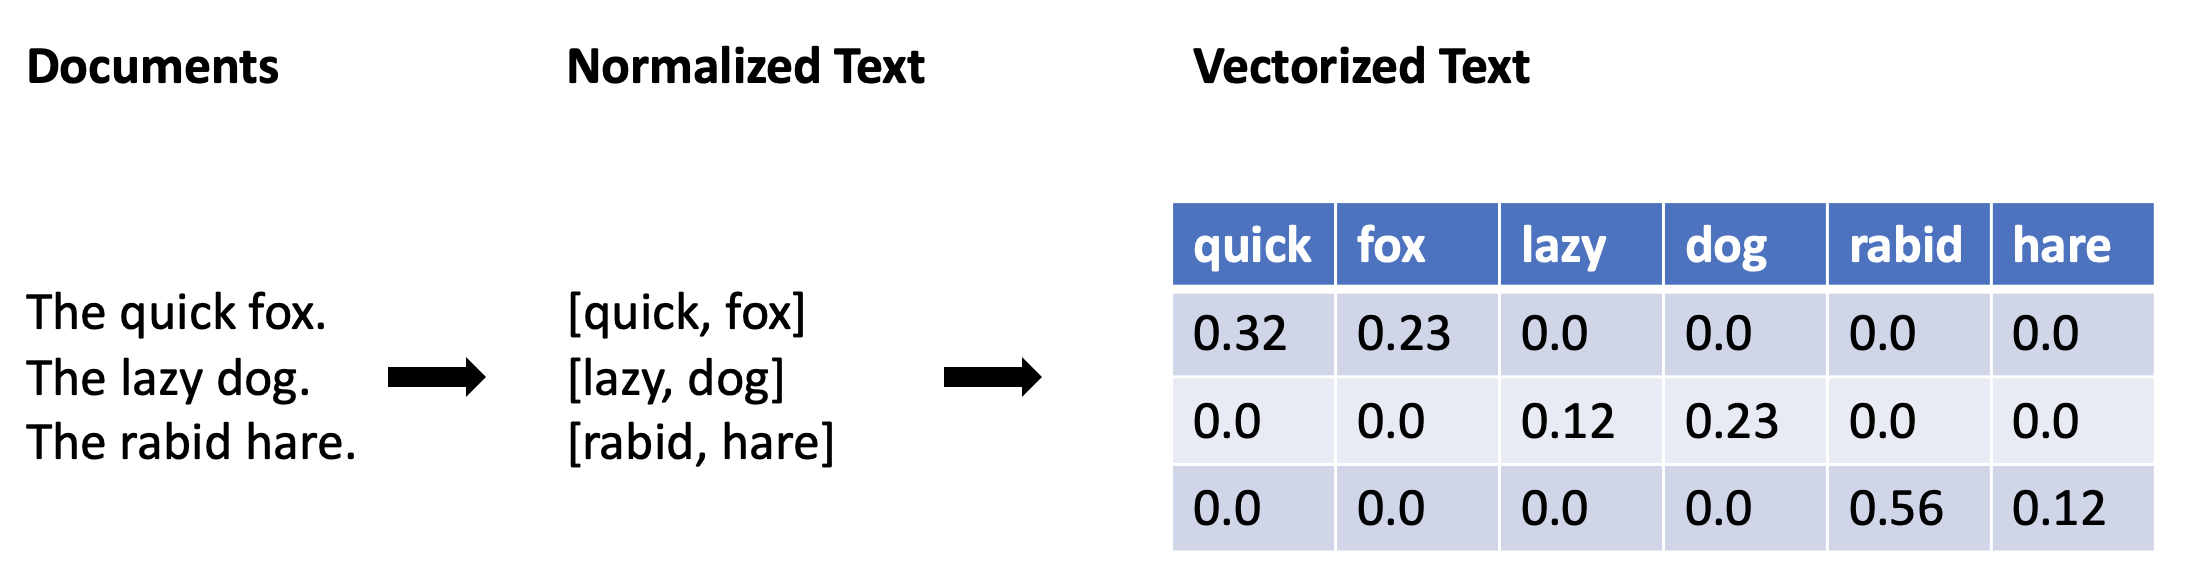